# Map making 

First we make a map over the data point and then we create a map over average price using a GEOjson downloaded from the internet 

In [25]:
#First installing the packages

pip install basemap-data-hires
pip install basemap

   ---------------------------------------- 0.0/91.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/91.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/91.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/91.1 MB 187.9 kB/s eta 0:08:05
   ---------------------------------------- 0.1/91.1 MB 297.7 kB/s eta 0:05:06
   ---------------------------------------- 0.4/91.1 MB 1.7 MB/s eta 0:00:53
   ---------------------------------------- 1.0/91.1 MB 3.9 MB/s eta 0:00:24
    --------------------------------------- 1.1/91.1 MB 3.6 MB/s eta 0:00:25
    --------------------------------------- 1.8/91.1 MB 5.0 MB/s eta 0:00:18
    --------------------------------------- 2.2/91.1 MB 5.4 MB/s eta 0:00:17
   - -------------------------------------- 2.8/91.1 MB 6.3 MB/s eta 0:00:15
   - -------------------------------------- 3.2/91.1 MB 6.3 MB/s eta 0:00:14
   - -------------------------------------- 3.9/91.1 MB 7.0 MB/s eta 0:00:13
   - -----------

### Map of apartments data points:

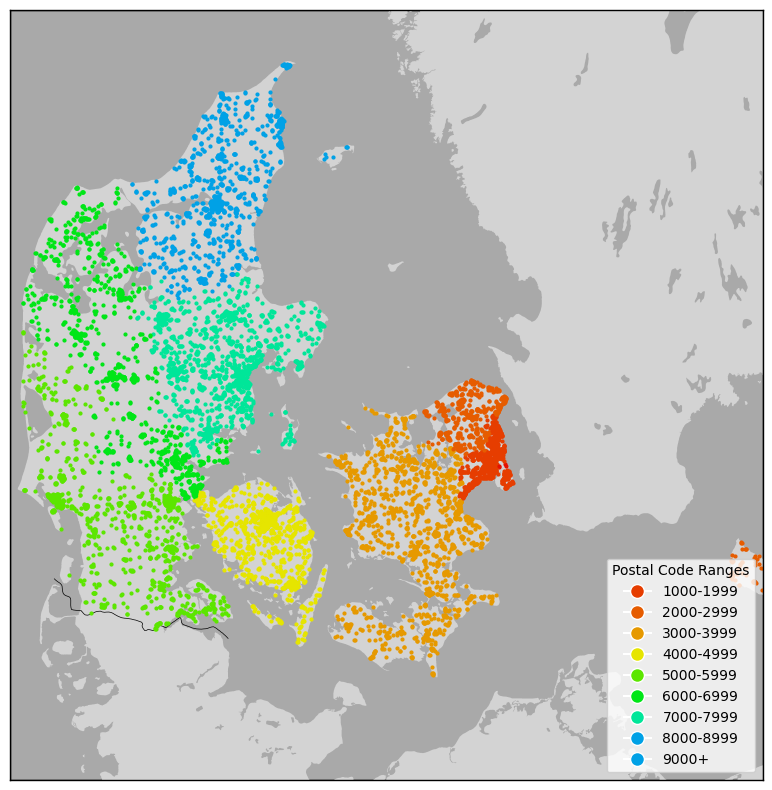

In [33]:
df_villa = pd.read_csv('Boligsiden_med_årnu.csv')

# Define a function to map colors based on postal code
def get_color(postal_code):
    if 1000 <= postal_code < 2000:
        hue = 0.1111*0.1
    elif 2000 <= postal_code < 3000:
        hue = 0.2222*0.2
    elif 3000 <= postal_code < 4000:
        hue = 0.3333*0.2
    elif 4000 <= postal_code < 5000:
        hue = 0.4444*0.25
    elif 5000 <= postal_code < 6000:
        hue = 0.5555*0.3
    elif 6000 <= postal_code < 7000:
        hue = 0.6666*0.4
    elif 7000 <= postal_code < 8000:
        hue = 0.7777*0.45
    elif 8000 <= postal_code < 9000:
        hue = 0.8888*0.5
    else:
        hue = 0.9999*0.55
    
    saturation = 1.0
    brightness = 0.9
    
    hsv_color = (hue, saturation, brightness)
    rgb_color = hsv_to_rgb(hsv_color)
    
    return tuple(rgb_color)


# Create a map focused on Denmark
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='merc', llcrnrlat=54, urcrnrlat=58, llcrnrlon=8, urcrnrlon=15, resolution='f')
m.drawcountries()
m.drawmapboundary(fill_color='#A9A9A9')  # Darker grey for water
m.fillcontinents(color='#D3D3D3', lake_color='#A9A9A9')  # Light grey for land

# Plot the data points on the map
for idx, row in df_villa.iterrows():
    color = get_color(row["Postal code"])  # Use the correct column name
    x, y = m(row["Longitude"], row["Latitude"])
    m.plot(x, y, 'o', color=color, markersize=2)

# Add a legend for the postal code ranges
labels = ["1000-1999", "2000-2999", "3000-3999", "4000-4999", "5000-5999", "6000-6999", "7000-7999", "8000-8999", "9000+"]
colors = [get_color(code * 1000 + 1000) for code in range(1, 10)]
patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in zip(labels, colors)]

# Adjust legend placement
plt.legend(handles=patches, title="Postal Code Ranges", loc='lower right', bbox_to_anchor=(0.99, 0.01), borderaxespad=0.)

# Save as png
plt.savefig("Map_Villa.png", dpi=300)

plt.show()


In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm


In [61]:
import pandas as pd
import json

#the map file from the internet consisted of data with municipality labels and locations and then an empty map so first we connect them together,
#using the code given with the data 
csv_table = pd.read_csv("data.csv")

with open('municipalities.geojson') as f:
    geojson = json.load(f)


for municipality in geojson['features']:
       row_data = csv_table[csv_table['lau_1'] == int(municipality['properties']['lau_1'])]

    if not row_data.empty:
       municipality['properties'] = {}

        
        for header in row_data.columns:
            value = row_data.iloc[0][header]
            # Convert numpy types to native Python types
            if pd.api.types.is_numeric_dtype(type(value)):
                value = int(value) if isinstance(value, (np.int64, np.int32)) else float(value)
            municipality['properties'][header] = value

#We then save the file 
with open('updated_municipalities.geojson', 'w') as f:
    json.dump(geojson, f)


In [79]:
import pandas as pd
import geopandas as gpd

# Load the CSV data
df_villa = pd.read_csv('Boligsiden_med_årnu.csv')

# Load the GeoJSON data
gdf = gpd.read_file('updated_municipalities.geojson')

# Inspect the columns and a few rows of each dataframe
print(df_villa.head())
print(df_villa.columns)

print(gdf.head())
print(gdf.columns)


                           Adress           City Street name  Postal code  \
0     Nørregade 27, Agerskov 6534       Agerskov   Nørregade         6534   
1  Keldsvej 5, Store Fuglede 4480  Store Fuglede    Keldsvej         4480   
2     Tofteengen 8, Roskilde 4000       Roskilde  Tofteengen         4000   
3      Længstedal 16, Skjern 6900         Skjern  Længstedal         6900   
4          Åskrænten 22, Egå 8250            Egå   Åskrænten         8250   

    Latitude  Longitude Rooms Property type Energy label    Price  ...  \
0  55.130960   9.136025     4         Villa            E   495000  ...   
1  55.577656  11.180144     7         Villa            C  1695000  ...   
2  55.693270  12.147028     7         Villa          NaN  6495000  ...   
3  56.003277   8.696856     7         Villa            C  1495000  ...   
4  56.203278  10.264264     5         Villa            C  6998000  ...   

  Healthcare expense  Green Spaces expense Infrastructure expense  \
0          7853000.0   

In [81]:
# Clean up column names and ensure consistent formatting
df_villa['municipality'] = df_villa['Municipality'].str.strip()
gdf['label_dk'] = gdf['label_dk'].str.strip()


In [198]:

merged_gdf = gdf.merge(df_villa, left_on='label_dk', right_on='Municipality', how='left')

merged_gdf

,lau_1,label_en,label_dk,iso_3166_2,geometry,Adress,City,Street name,Postal code,Latitude,...,Healthcare expense,Green Spaces expense,Infrastructure expense,Social Services expense,Landejendom,Fritidsbolig,Elderly Care expense (mio.),Elementary school expense (mio.),Year built,Bathrooms
0,766,Hedensted,Hedensted,DK-82,"POLYGON Z ((9.44919 55.86046 -999, 9.4602 55.8...","Årupparken 32, Hedensted 8722",Hedensted,Årupparken,8722.0,55.777798,...,7758000.0,0.0,36407000.0,34739000.0,0.0,0.0,209.724,401.063,1995.0,2.0
1,766,Hedensted,Hedensted,DK-82,"POLYGON Z ((9.44919 55.86046 -999, 9.4602 55.8...","Bellemøllebanke 14, Stouby 7140",Stouby,Bellemøllebanke,7140.0,55.707990,...,7758000.0,0.0,36407000.0,34739000.0,0.0,0.0,209.724,401.063,1900.0,2.0
2,766,Hedensted,Hedensted,DK-82,"POLYGON Z ((9.44919 55.86046 -999, 9.4602 55.8...","Lundbovej 5, Stouby 7140",Stouby,Lundbovej,7140.0,55.701996,...,7758000.0,0.0,36407000.0,34739000.0,0.0,0.0,209.724,401.063,1956.0,2.0
3,766,Hedensted,Hedensted,DK-82,"POLYGON Z ((9.44919 55.86046 -999, 9.4602 55.8...","Tønballevej 8, Juelsminde 7130",Juelsminde,Tønballevej,7130.0,55.818817,...,7758000.0,0.0,36407000.0,34739000.0,0.0,0.0,209.724,401.063,1969.0,2.0
4,766,Hedensted,Hedensted,DK-82,"POLYGON Z ((9.44919 55.86046 -999, 9.4602 55.8...","Barritskovvej 32, Juelsminde 7130",Juelsminde,Barritskovvej,7130.0,55.713573,...,7758000.0,0.0,36407000.0,34739000.0,0.0,1.0,209.724,401.063,2005.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31809,173,Lyngby-Taarbæk,Lyngby-Taarbæk,DK-84,"POLYGON Z ((12.48091 55.79897 -999, 12.48926 5...","Bakketoppen 5, Virum 2830",Virum,Bakketoppen,2830.0,55.791110,...,8018000.0,0.0,33538000.0,44441000.0,0.0,0.0,379.163,457.688,1954.0,2.0
31810,173,Lyngby-Taarbæk,Lyngby-Taarbæk,DK-84,"POLYGON Z ((12.48091 55.79897 -999, 12.48926 5...","Granhøjvej 9, Kongens Lyngby 2800",Kongens Lyngby,Granhøjvej,2800.0,55.762413,...,8018000.0,0.0,33538000.0,44441000.0,0.0,0.0,379.163,457.688,1933.0,2.0
31811,173,Lyngby-Taarbæk,Lyngby-Taarbæk,DK-84,"POLYGON Z ((12.48091 55.79897 -999, 12.48926 5...","Kollelevbakken 35, Virum 2830",Virum,Kollelevbakken,2830.0,55.792760,...,8018000.0,0.0,33538000.0,44441000.0,0.0,0.0,379.163,457.688,1954.0,2.0
31812,173,Lyngby-Taarbæk,Lyngby-Taarbæk,DK-84,"POLYGON Z ((12.48091 55.79897 -999, 12.48926 5...","Nybrovej 224, Kongens Lyngby 2800",Kongens Lyngby,Nybrovej,2800.0,55.767593,...,8018000.0,0.0,33538000.0,44441000.0,0.0,0.0,379.163,457.688,1969.0,3.0


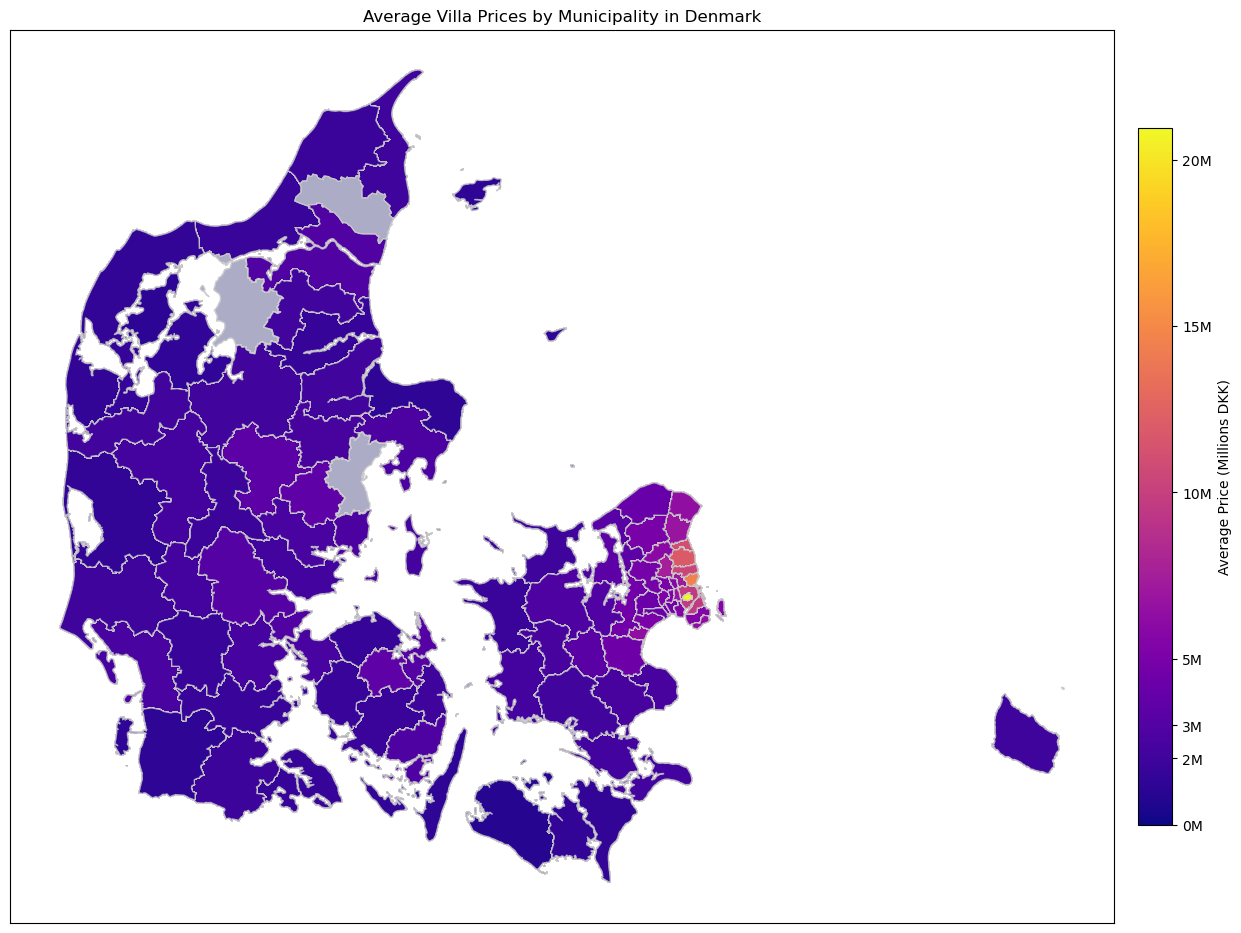

In [200]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# Compute average price per municipality
avg_price_per_municipality = merged_gdf.groupby('label_dk')['Price'].mean().reset_index()
avg_price_per_municipality.columns = ['label_dk', 'Average_Price']

# Merge the average prices back into the GeoDataFrame
merged_gdf = merged_gdf.merge(avg_price_per_municipality, on='label_dk', how='left')

# Convert price to millions
merged_gdf['Average_Price_millions'] = merged_gdf['Average_Price'] / 1_000_000
merged_gdf['Average_Price_millions'] = merged_gdf['Average_Price_millions'].fillna(0)  # Assign 0 for missing prices

# Define colormap and normalization
vmax = merged_gdf['Average_Price_millions'].max()  # Ensure the normalization covers the entire range
norm = Normalize(vmin=0, vmax=vmax)
cmap = cm.plasma

# Plot municipalities with colors representing average prices
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Plot with specific color for missing data
missing_color = 'lightgrey'
merged_gdf.plot(column='Average_Price_millions', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.7, norm=norm)

# Overlay missing data with a grey color
missing_gdf = merged_gdf[merged_gdf['Average_Price'].isna()]
missing_gdf.plot(ax=ax, color=missing_color, edgecolor='0.8', alpha=0.7)

# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

# Add a colorbar with more interpretable ticks
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Not strictly necessary, but helps in some cases
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, fraction=0.03, shrink=0.7)
cbar.set_label('Average Price (Millions DKK)')

# Adjust colorbar ticks
# Use the actual range of your data
ticks = [0, 2, 3, 5, 10, 15, 20 ]  # Adjust based on your data range
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{tick}M' for tick in ticks])

# Add a title
plt.title("Average Villa Prices by Municipality in Denmark")

# Save and show the plot
plt.savefig("Map_Villa_Municipality.png", dpi=300, bbox_inches='tight')
plt.show()
